## Assingmnet No.: 4
### Name: Parkale Shreya Jagdish 
### Roll No.:2447060 
### Batch: C 
### Problem Statement – 
 Design and implement a CNN for Image Classification a) Select a suitable image classification dataset 
(medical imaging, agricultural, etc.). b) Optimized with different hyper-parameters including 
learning rate, filter size, no. of layers, optimizers, dropouts, etc. 

### 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### 2. Load & Preprocess CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Class names for reference
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

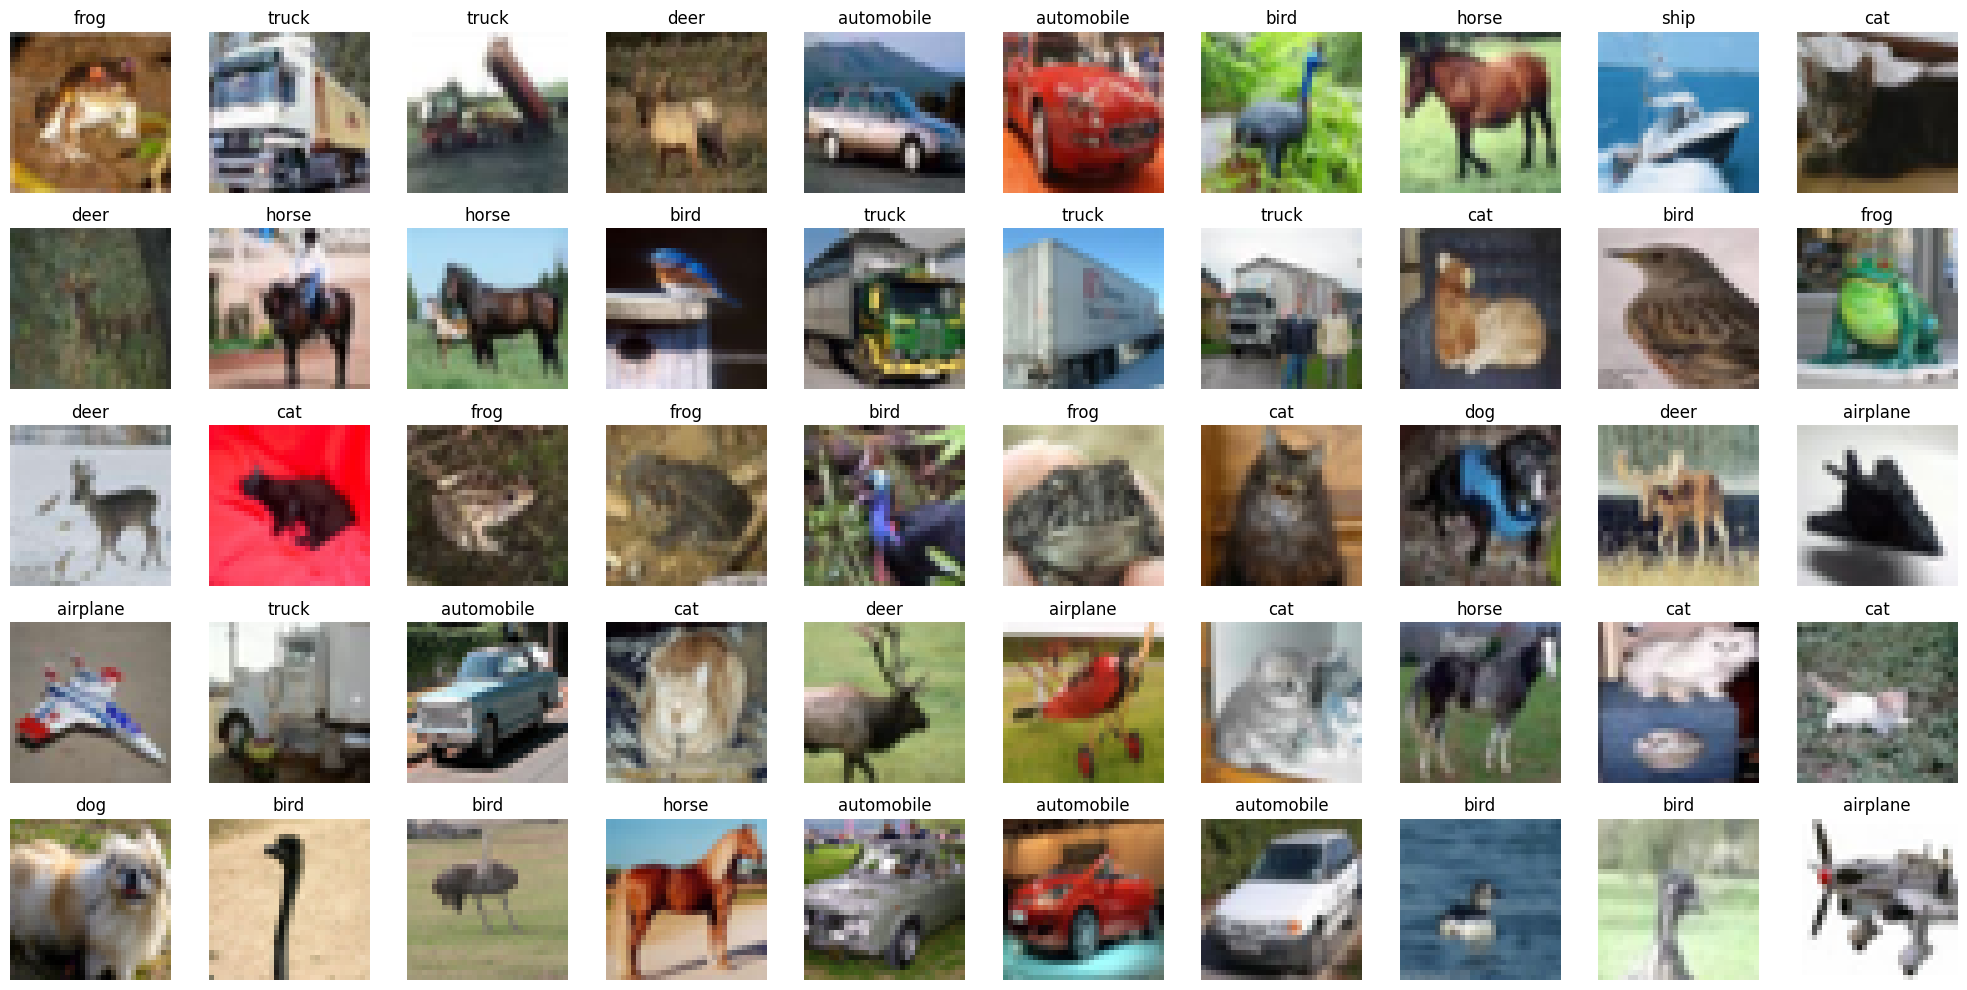

In [4]:
def show_dataset_grid(x, y, class_names, rows=5, cols=10):
    plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img = x[i]
        if img.max() <= 1.0:
            img = (img * 255).astype("uint8")  # convert to 0–255 if normalized
        plt.imshow(img)
        plt.title(class_names[y[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
y_train = y_train.flatten()
show_dataset_grid(x_train, y_train, class_names, rows=5, cols=10)


In [5]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### 3. Define CNN Model

In [7]:
def create_cnn_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))  # 10 classes

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### 4. Train Model with Hyperparameters

In [8]:
# Try different optimizers
optimizer = Adam(learning_rate=0.001)  # Try SGD(learning_rate=0.01) as well
dropout_rate = 0.3

model = create_cnn_model(optimizer=optimizer, dropout_rate=dropout_rate)

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_split=0.2, verbose=1)

D:\Users\shrey\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.3209 - loss: 1.8536 - val_accuracy: 0.5229 - val_loss: 1.3570
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5117 - loss: 1.3556 - val_accuracy: 0.5842 - val_loss: 1.1812
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5707 - loss: 1.2104 - val_accuracy: 0.5978 - val_loss: 1.1317
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6158 - loss: 1.1048 - val_accuracy: 0.6376 - val_loss: 1.0293
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6360 - loss: 1.0303 - val_accuracy: 0.6463 - val_loss: 0.9970


### 5. Evaluate the Model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6566 - loss: 0.9788

Test Accuracy: 64.96%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


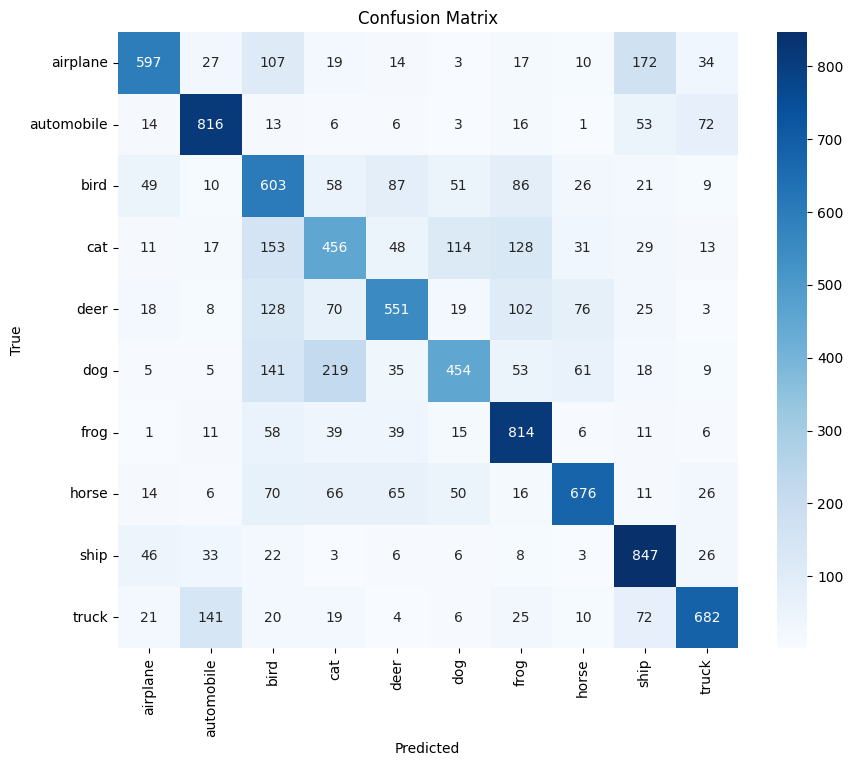

In [10]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [11]:
# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.77      0.60      0.67      1000
  automobile       0.76      0.82      0.79      1000
        bird       0.46      0.60      0.52      1000
         cat       0.48      0.46      0.47      1000
        deer       0.64      0.55      0.59      1000
         dog       0.63      0.45      0.53      1000
        frog       0.64      0.81      0.72      1000
       horse       0.75      0.68      0.71      1000
        ship       0.67      0.85      0.75      1000
       truck       0.78      0.68      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



### 6. Plot Training & Validation Accuracy/Loss

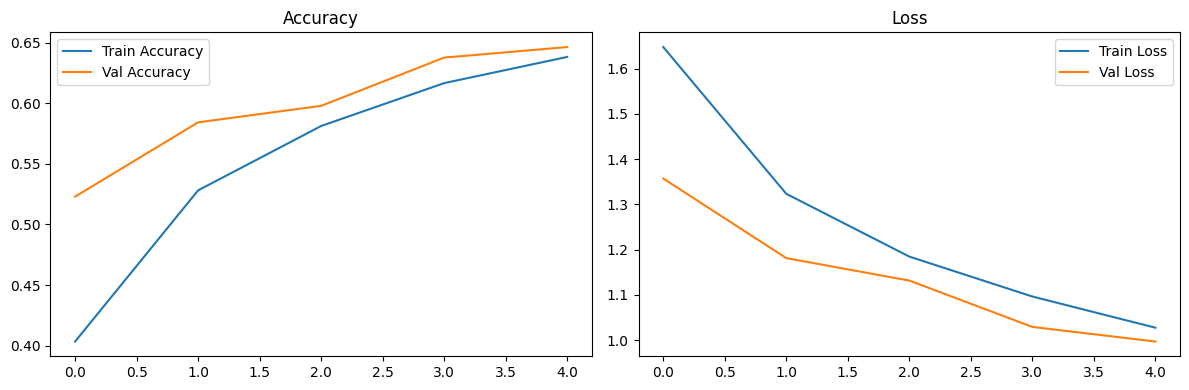

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


img_path = input("Enter the path of the image: ")


img = Image.open(img_path).resize((32, 32))  # Resize for CIFAR-10
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]




Enter the path of the image: Truck.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



Predicted class: truck


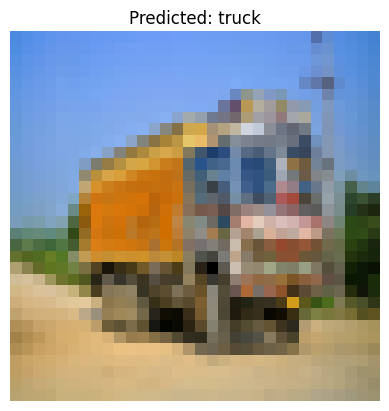

In [14]:
print(f"\nPredicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()